<a href="https://colab.research.google.com/github/mccsandora/alphabet_complexity/blob/main/Data%20and%20Font%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Existing Data Analysis (**Ignore**)

In [4]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def create_df_unicode():
    with open('/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/unicode_names_list.txt','r') as f:
        unicode = f.read()
    unicode = unicode.split('\n')
    df_unicode = pd.DataFrame([u.split('\t')
            for u in unicode if len(u)>0 and u[0] not in '\t;@'],
                columns=['code','note'])
    df_unicode = df_unicode[df_unicode.note.apply(lambda x: x[0]!='<')].reset_index(drop=True)
    df_unicode.note.apply(lambda x: x.split()[0]).value_counts().index.tolist()
    df_unicode['rep'] = df_unicode.code.apply(u)
    return df_unicode

def u(i):
    try:
        return chr(int(i, 16))
    except:
        return i

def get_language(note):
    return note.split()[0]

def code_type(code):
    u = '0x'+code
    for a,b,c in [('0x1F600', '0x1F64F', 'Emoticons'),
                  ('0x1F300', '0x1F5FF', 'Misc Symbols and Pictographs'),
                  ('0x1F680', '0x1F6FF', 'Transport and Map'),
                  ('0x2600', '0x26FF', 'Misc symbols'),
                  ('0x2700', '0x27BF', 'Dingbats'),
                  ('0xFE00', '0xFE0F', 'Variation Selectors'),
                  ('0x1F900', '0x1F9FF', 'Supplemental Symbols and Pictographs'),
                  ('0x1F1E6', '0x1F1FF', 'Flags')]:
        if a<=u<=b:
            return c
    return 'Writing Symbol'

def make_picture(code,ttf):
    image = Image.new('RGB', (100,100))

    draw = ImageDraw.Draw(image)
    draw.text((50,50),
              u(code),
              font=ImageFont.truetype(ttf, 11))
    picture = np.mean(255-np.array(image),axis=-1)/255
    return picture

df_unicode = create_df_unicode()
dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
dfu['language'] = dfu.note.apply(get_language)
dfu['picture'] = dfu.code.apply(lambda x: make_picture(x,'/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/unifont-15.0.06.ttf'))

Notice characters with unicode instead of their rep

In [5]:
' '.join(dfu[dfu.language=='DEVANAGARI'].rep)

'ऀ ँ ं ः ऄ अ आ इ ई उ ऊ ऋ ऌ ऍ ऎ ए ऐ ऑ ऒ ओ औ क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न ऩ प फ ब भ म य र ऱ ल ळ ऴ व श ष स ह ऺ ऻ ़ ऽ ा ि ी ु ू ृ ॄ ॅ ॆ े ै ॉ ॊ ो ौ ् ॎ ॏ ॐ ॑ ॒ ॓ ॔ ॕ ॖ ॗ क़ ख़ ग़ ज़ ड़ ढ़ फ़ य़ ॠ ॡ ॢ ॣ । ॥ ० १ २ ३ ४ ५ ६ ७ ८ ९ ॰ ॱ ॲ ॳ ॴ ॵ ॶ ॷ ॸ ॹ ॺ ॻ ॼ ॽ ॾ ॿ ꣲ ꣳ ꣴ ꣵ ꣶ ꣷ ꣸ ꣹ ꣺ ꣻ ꣼ ꣽ ꣾ ꣿ \U00011b00 \U00011b01 \U00011b02 \U00011b03 \U00011b04 \U00011b05 \U00011b06 \U00011b07 \U00011b08 \U00011b09'

In [6]:
dfu[dfu.language=='DEVANAGARI']

,code,note,rep,language,picture
2164,0900,DEVANAGARI SIGN INVERTED CANDRABINDU,ऀ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2165,0901,DEVANAGARI SIGN CANDRABINDU,ँ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2166,0902,DEVANAGARI SIGN ANUSVARA,ं,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2167,0903,DEVANAGARI SIGN VISARGA,ः,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2168,0904,DEVANAGARI LETTER SHORT A,ऄ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...
20663,11B05,DEVANAGARI SIGN EXTENDED BHALE WITH HOOK,𑬅,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20664,11B06,DEVANAGARI SIGN WESTERN FIVE-LIKE BHALE,𑬆,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20665,11B07,DEVANAGARI SIGN WESTERN NINE-LIKE BHALE,𑬇,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20666,11B08,DEVANAGARI SIGN REVERSED NINE-LIKE BHALE,𑬈,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [7]:
print(dfu.rep[20663])
print(dfu.rep[20667])

𑬅
𑬉


In [8]:
print(dfu.rep[20663]==dfu.rep[20667])

False


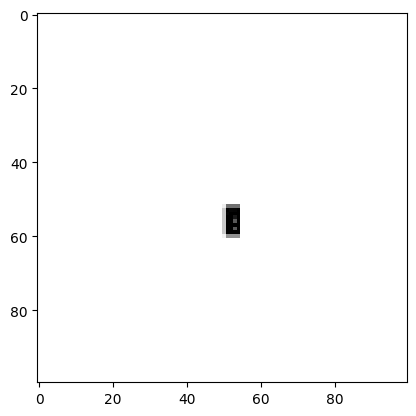

In [9]:
plt.imshow(dfu.iloc[20663].picture,cmap='gray')
plt.show()

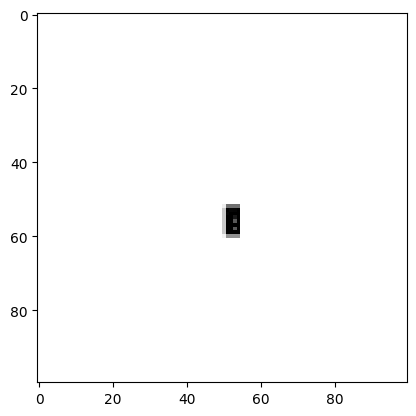

In [10]:
plt.imshow(dfu.iloc[20667].picture,cmap='gray')
plt.show()

In [11]:
dfu.picture[20663]==dfu.picture[20667]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
incorrect_rep = []
for x in range(0,33046):
  if((dfu.picture[x]==dfu.picture[20667]).all()):
    incorrect_rep.append(x)

In [13]:
len(incorrect_rep)

15135

In [14]:
len(dfu)-len(incorrect_rep)

17911

# **FONT ANALYSIS**

In [15]:
fonts = {
    'NotoSans': "/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/NotoSans-Regular.ttf",
    'GnuUnifont': "/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/unifont-15.0.06.ttf",
    'CourierNew': "/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/courier_new.ttf",
    'Code2000': "/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/CODE2000.ttf",
    'ArielUnicodeMS': "/content/drive/MyDrive/Colab Notebooks/JYOTIKA/Alphabet_complexity/data/ttfs/Arial Unicode MS Font.ttf"
}

GetBestCmap() retrieves the mapping of character codes (Unicode code points) to glyph indices from the TTFont object represented by font_name. The .getBestCmap() method returns a dictionary that represents the "best" Unicode cmap subtable available in the font. The .keys() method is then used to retrieve the keys (character codes) from the cmap dictionary.

For example, if you have a font named font_name and it supports characters like 'A', 'B', 'C', and 'D', the output of set(font_name.getBestCmap().keys()) will be a set containing the corresponding Unicode code points for these characters.

In [19]:
from fontTools.ttLib import TTFont
import pandas as pd

data = {}

# for font_name, font_path in fonts.items():
#     font = TTFont(font_path)
#     supported_chars = set(font.getBestCmap().keys())
#     all_chars = set(range(0x10000))  # Set of all possible Unicode characters (up to 0x10000)
#     unsupported_chars = all_chars - supported_chars
#     temp['Font'].append(font_name)
#     temp['#Supported characters'].append(num_supported_chars)
#     temp['#Unsupported characters'].append(num_unsupported_chars)


temp = {'Font': [], '#Supported characters': [], '#Unsupported characters': []}
for font_name, font_path in fonts.items():
    data[font_name] = {}
    di = {'Supported char': (), 'Unsupported char': ()}
    data[font_name] = di

for font_name, font_path in fonts.items():
    font = TTFont(font_path)
    supported_chars = set(font.getBestCmap().keys())
    all_chars = set(range(0x10000))  # Set of all possible Unicode characters (up to 0x10000)
    unsupported_chars = all_chars - supported_chars
    data[font_name]['Supported char'] = supported_chars
    data[font_name]['Unsupported char'] = unsupported_chars
    num_supported_chars = len(supported_chars)
    num_unsupported_chars = len(unsupported_chars)
    temp['Font'].append(font_name)
    temp['#Supported characters'].append(num_supported_chars)
    temp['#Unsupported characters'].append(num_unsupported_chars)

df = pd.DataFrame(temp)
print(df)
print()

# Print the keys of the main dictionary
print(data.keys())

# Print the keys of the nested dictionaries
for value in data.values():
    print(value.keys())

             Font  #Supported characters  #Unsupported characters
0        NotoSans                   3053                    62483
1      GnuUnifont                  57087                     8450
2      CourierNew                   2846                    62690
3        Code2000                  52786                    12750
4  ArielUnicodeMS                  38917                    26619

dict_keys(['NotoSans', 'GnuUnifont', 'CourierNew', 'Code2000', 'ArielUnicodeMS'])
dict_keys(['Supported char', 'Unsupported char'])
dict_keys(['Supported char', 'Unsupported char'])
dict_keys(['Supported char', 'Unsupported char'])
dict_keys(['Supported char', 'Unsupported char'])
dict_keys(['Supported char', 'Unsupported char'])


In [20]:
data['GnuUnifont']['Unsupported char']

{55296,
 55297,
 55298,
 55299,
 55300,
 55301,
 55302,
 55303,
 55304,
 55305,
 55306,
 55307,
 55308,
 55309,
 55310,
 55311,
 55312,
 55313,
 55314,
 55315,
 55316,
 55317,
 55318,
 55319,
 55320,
 55321,
 55322,
 55323,
 55324,
 55325,
 55326,
 55327,
 55328,
 55329,
 55330,
 55331,
 55332,
 55333,
 55334,
 55335,
 55336,
 55337,
 55338,
 55339,
 55340,
 55341,
 55342,
 55343,
 55344,
 55345,
 55346,
 55347,
 55348,
 55349,
 55350,
 55351,
 55352,
 55353,
 55354,
 55355,
 55356,
 55357,
 55358,
 55359,
 55360,
 55361,
 55362,
 55363,
 55364,
 55365,
 55366,
 55367,
 55368,
 55369,
 55370,
 55371,
 55372,
 55373,
 55374,
 55375,
 55376,
 55377,
 55378,
 55379,
 55380,
 55381,
 55382,
 55383,
 55384,
 55385,
 55386,
 55387,
 55388,
 55389,
 55390,
 55391,
 55392,
 55393,
 55394,
 55395,
 55396,
 55397,
 55398,
 55399,
 55400,
 55401,
 55402,
 55403,
 55404,
 55405,
 55406,
 55407,
 55408,
 55409,
 55410,
 55411,
 55412,
 55413,
 55414,
 55415,
 55416,
 55417,
 55418,
 55419,
 55420,
